In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [2]:

df = pd.read_csv('./data.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
print(df.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

In [5]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [6]:
print(df.shape) 
df.drop_duplicates(inplace=True) 
print(df.shape)

(4424, 37)
(4424, 37)


/var/folders/93/_k0zsyf9609_0p5cm6snprv80000gq/T/ipykernel_1108/2179791397.py:2: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


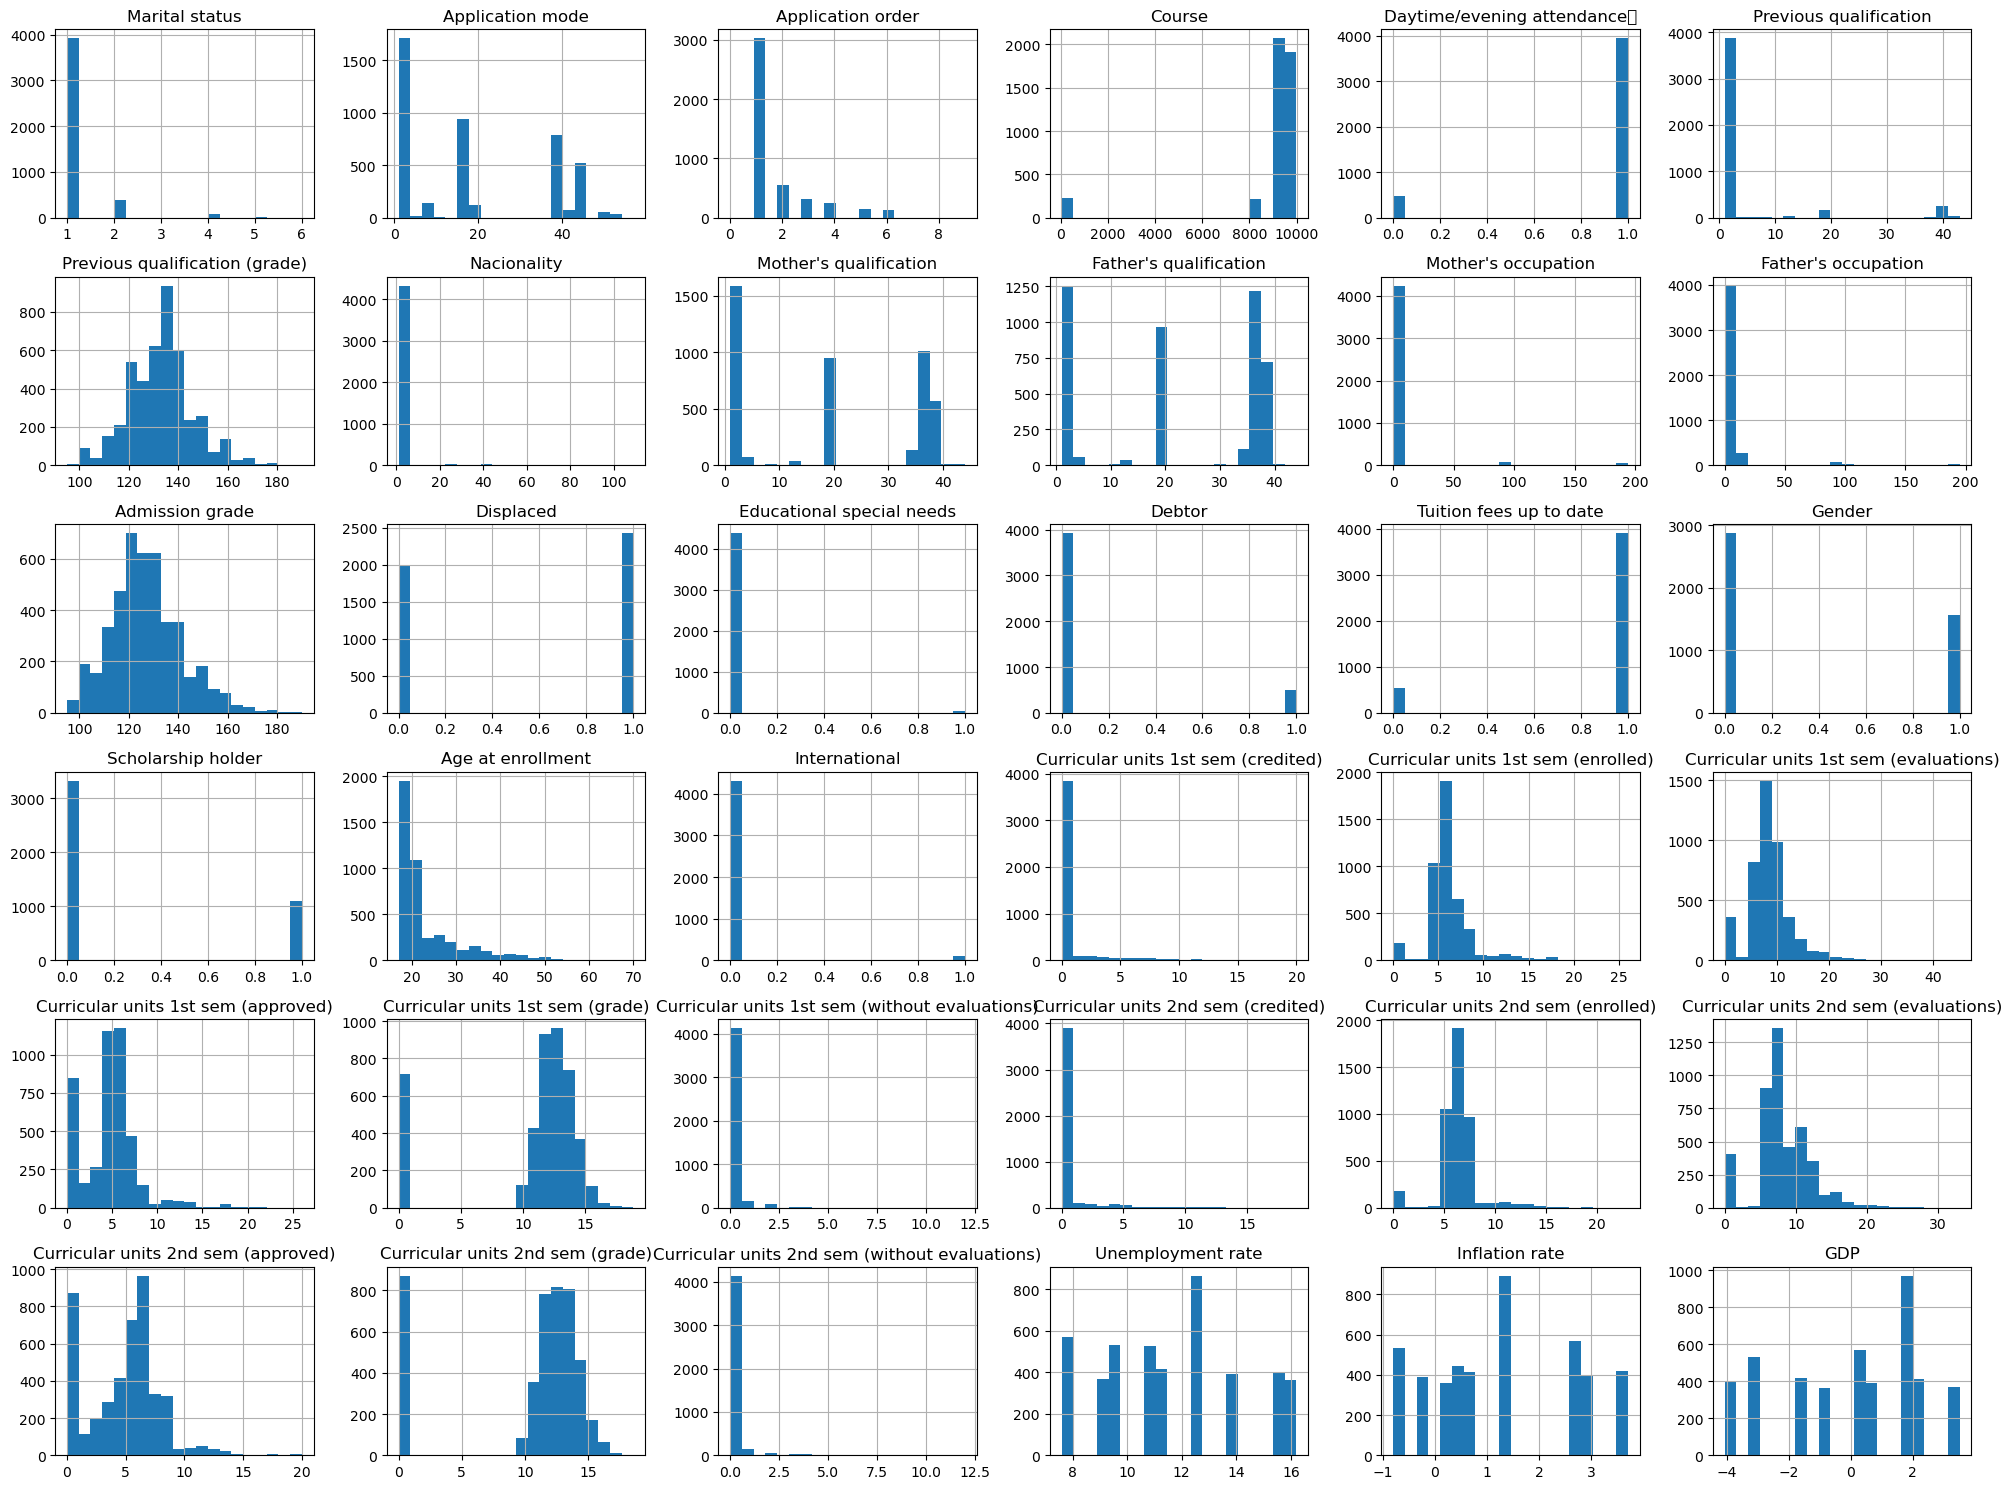

In [7]:
df.hist(bins=20, figsize=(20,15))
plt.tight_layout()
plt.show()

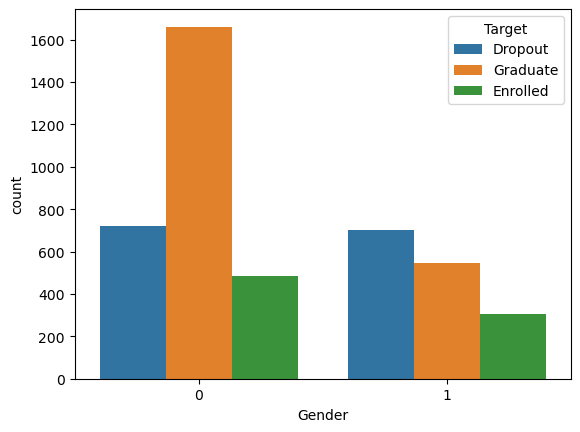

In [8]:
sns.countplot(x='Gender', hue='Target', data=df)
plt.show()

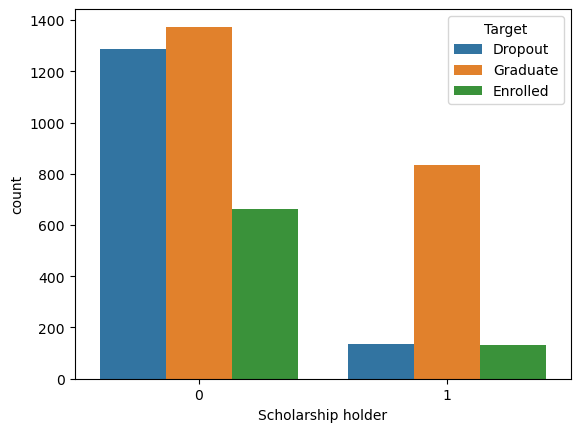

In [9]:
sns.countplot(x='Scholarship holder', hue='Target', data=df)
plt.show()

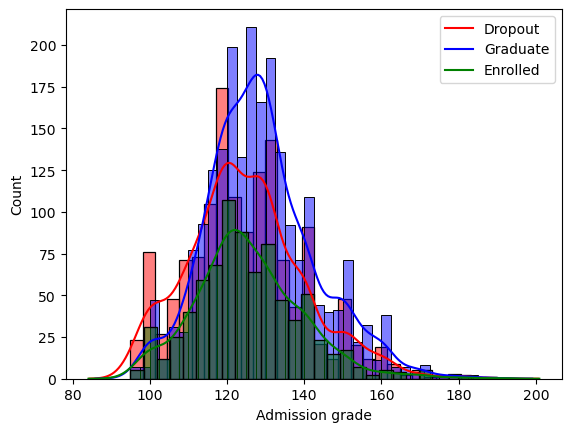

In [10]:

target_values = ['Dropout', 'Graduate', 'Enrolled']
colors = ['red', 'blue', 'green']

for target, color in zip(target_values, colors):
    sns.histplot(df[df['Target'] == target]['Admission grade'], color=color, alpha=0.5, kde=True, kde_kws=dict(cut=3))

plt.legend(target_values)
plt.show()

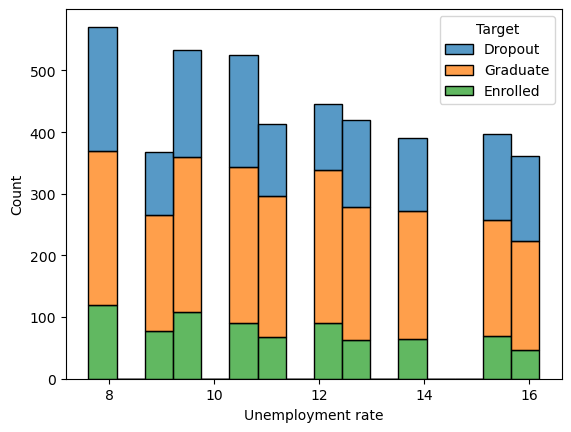

In [11]:
sns.histplot(data=df, x='Unemployment rate', hue='Target', multiple="stack")

plt.show()

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


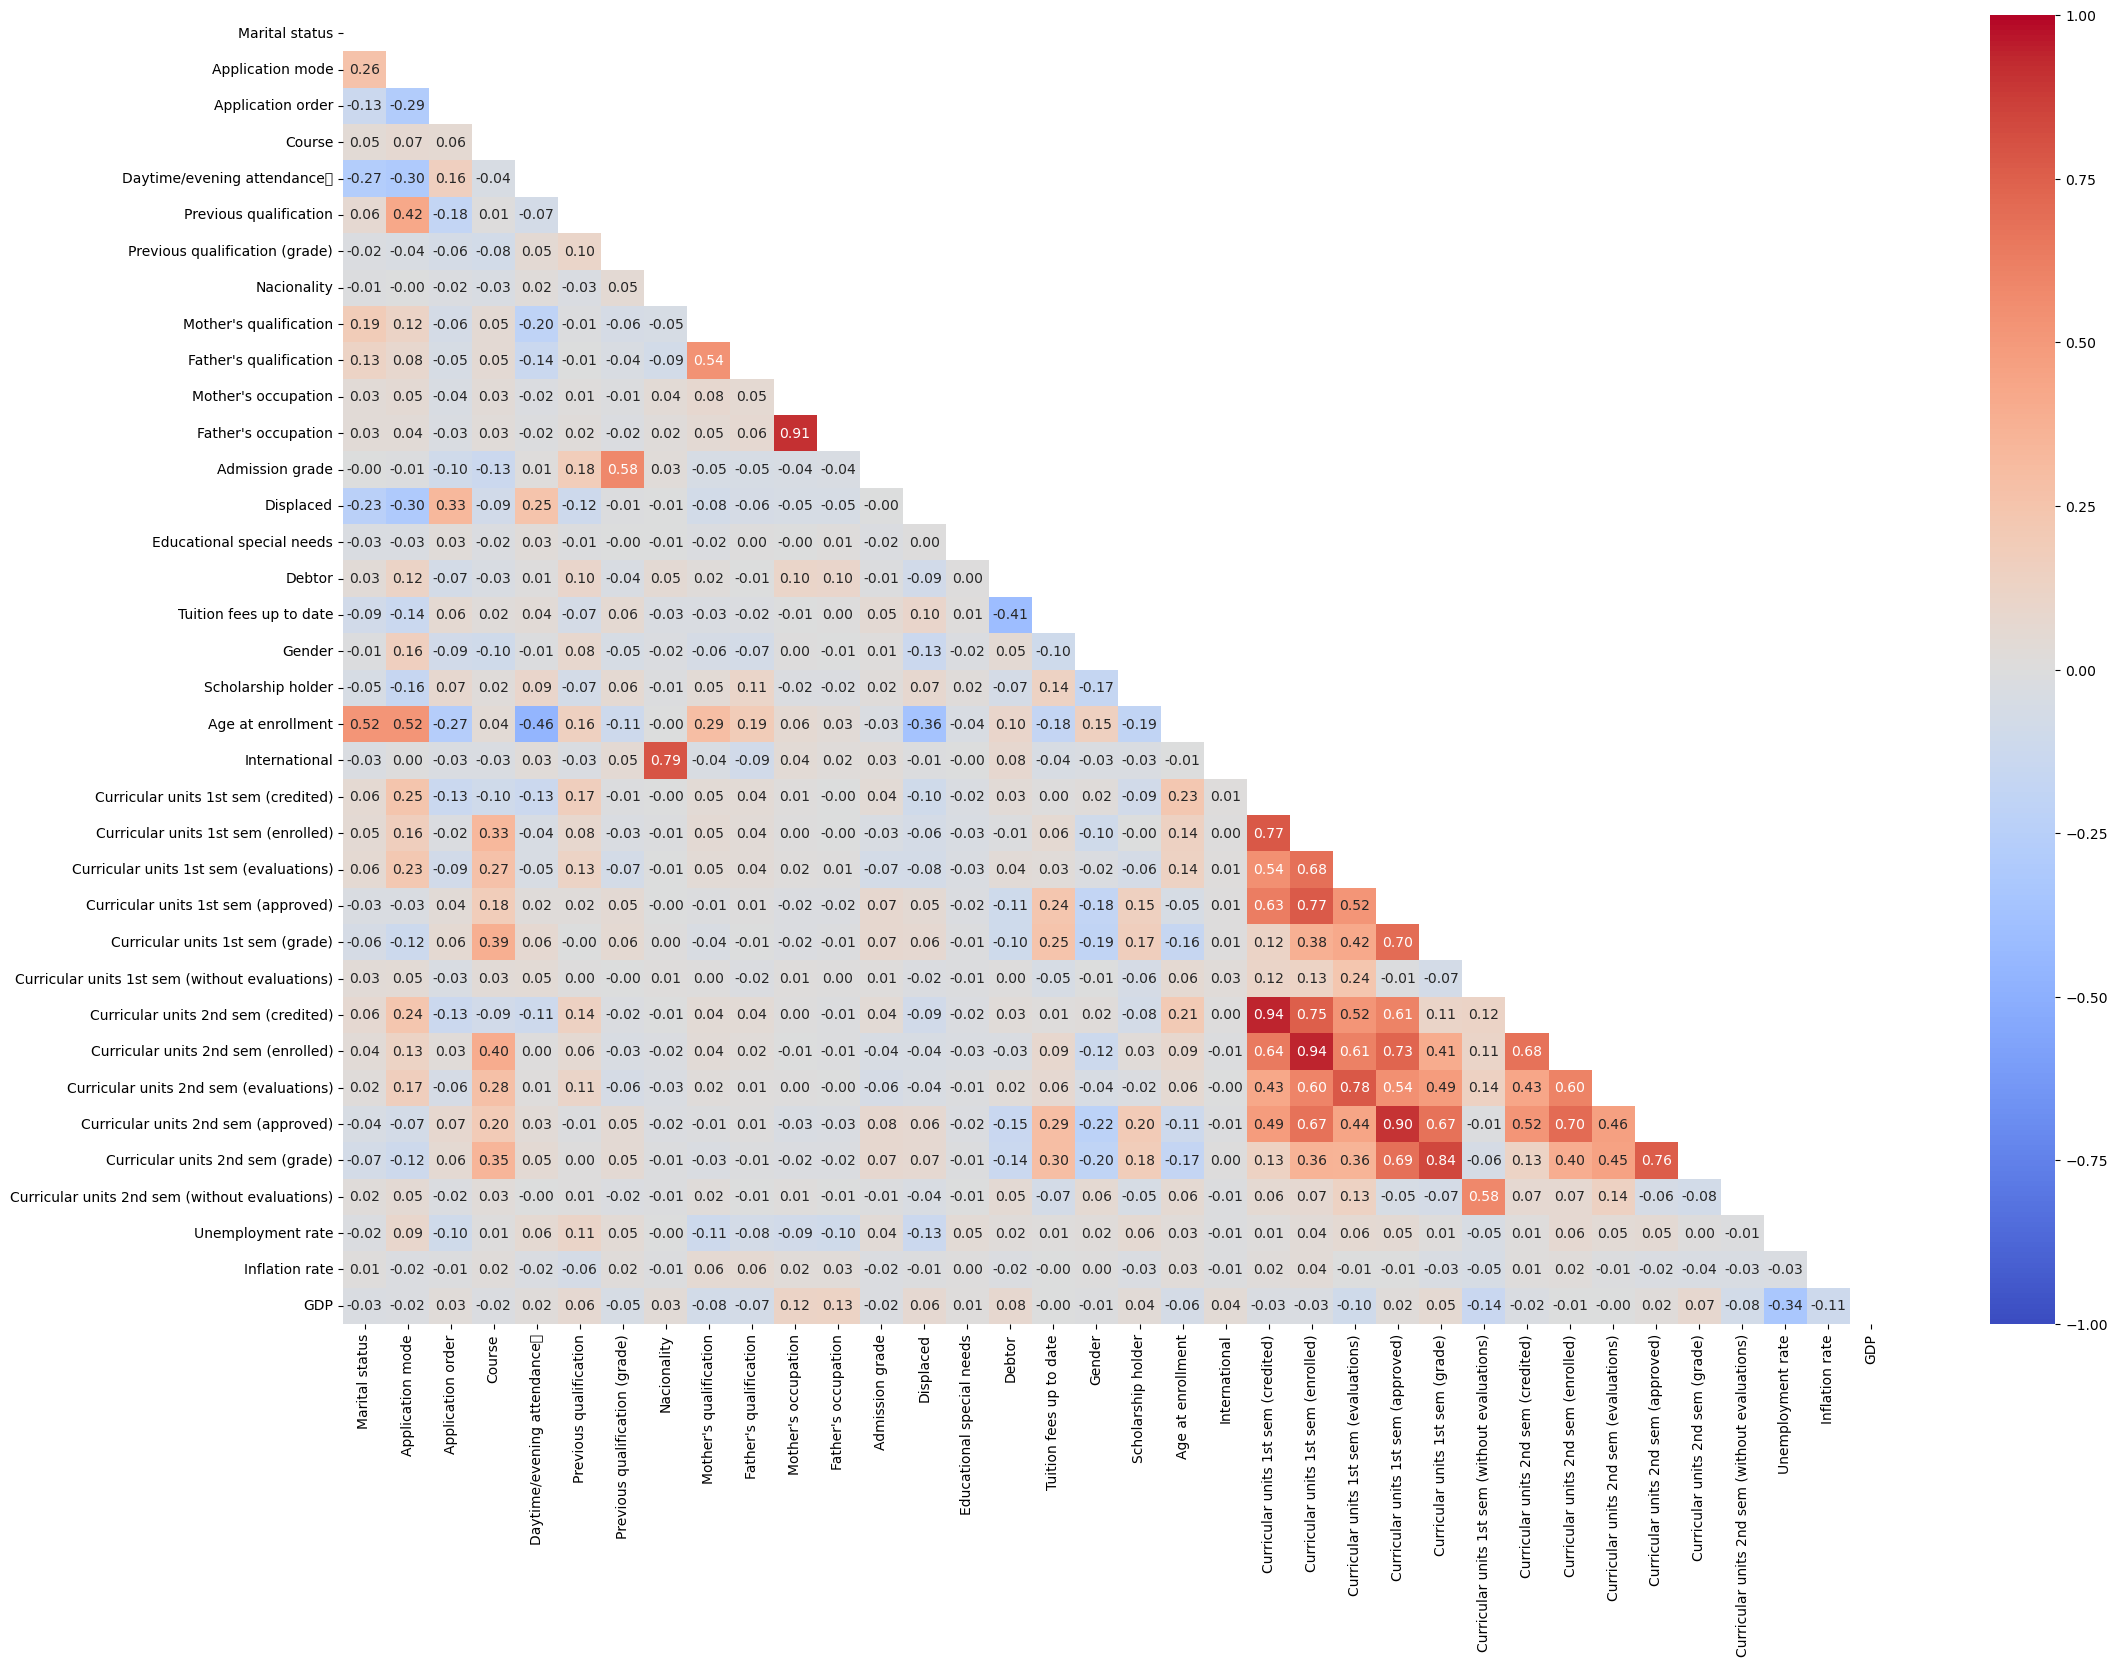

In [12]:
corr_matrix = df.drop(['Target'], axis=1).corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(25,17))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, annot=True, fmt='.2f', )
plt.show()


In [13]:
label_encoder = LabelEncoder()
df_encoded = df.copy()
df_encoded['Target'] = label_encoder.fit_transform(df['Target'])
df_encoded.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [14]:
standard_scaler = StandardScaler()
df_scaled = df_encoded.copy()

df_scaled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

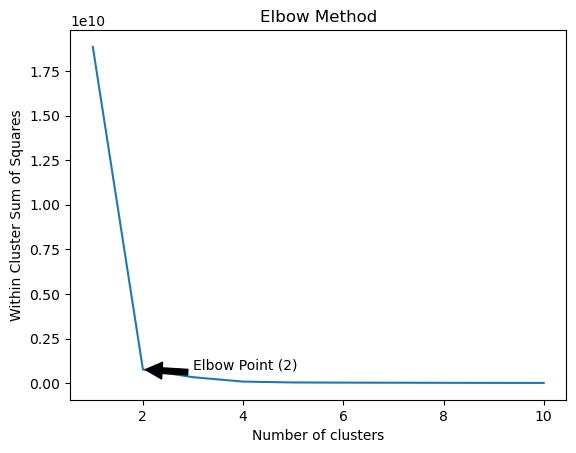

In [15]:
within_cluster_sum_of_squares = []

for clusters in range(1, 11):
    kmeans = KMeans(n_clusters=clusters, init='random', random_state=42)
    kmeans.fit(df_scaled)
    within_cluster_sum_of_squares.append(kmeans.inertia_)

knee_locator = KneeLocator(range(1, 11), within_cluster_sum_of_squares, curve='convex', direction='decreasing')
elbow_point = knee_locator.elbow

plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')

plt.annotate(f'Elbow Point ({elbow_point})', xy=(elbow_point, within_cluster_sum_of_squares[elbow_point - 1]), 
             xytext=(elbow_point + 1, within_cluster_sum_of_squares[elbow_point - 1] + 100),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [16]:
kmeans = KMeans(n_clusters=elbow_point, init='random', random_state=42)
kmeans.fit(df_scaled)

df['KMeans Cluster'] = kmeans.labels_

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
agglomerative = AgglomerativeClustering(n_clusters=elbow_point, linkage='ward', metric='euclidean')
agglomerative.fit(df_scaled)

df['Agglomerative Cluster'] = agglomerative.labels_

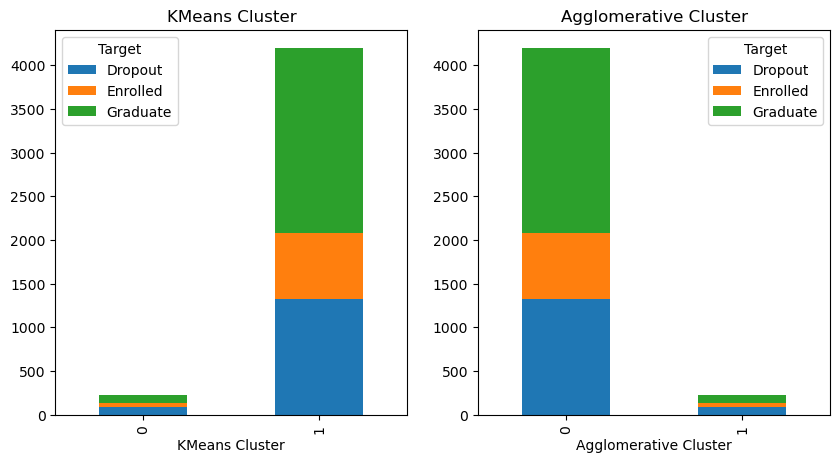

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for 'KMeans Cluster'
df.groupby(['KMeans Cluster', 'Target']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('KMeans Cluster')

# Plot for 'Agglomerative Cluster'
df.groupby(['Agglomerative Cluster', 'Target']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Agglomerative Cluster')

plt.show()

In [19]:
df.groupby('KMeans Cluster').agg(count=('KMeans Cluster', 'count'),
                                 marital_status=('Marital status', pd.Series.mode),
                                 course=('Course', 'mean'),
                                 admission_grade=('Admission grade', 'mean'),
                                 gender=('Gender', pd.Series.mode),
                                 age=('Age at enrollment', 'mean'),
                                 scholarship_holder=('Scholarship holder', pd.Series.mode),
                                 international_student=('International', pd.Series.mode),
                                 unemployment_rate=('Unemployment rate', 'mean'),
                                 inflation_rate=('Inflation rate', 'mean'),
                                 gdp=('GDP', 'mean'),
                                 )

,count,marital_status,course,admission_grade,gender,age,scholarship_holder,international_student,unemployment_rate,inflation_rate,gdp
KMeans Cluster,,,,,,,,,,,
0,227,1,163.704846,135.225991,1,20.775330,0,0,11.455947,1.151982,0.172115
1,4197,1,9326.811056,126.532023,0,23.399809,0,0,11.572099,1.232142,-0.007234


In [20]:
df.groupby('Agglomerative Cluster').agg(count=('KMeans Cluster', 'count'),
                                 marital_status=('Marital status', pd.Series.mode),
                                 course=('Course', 'mean'),
                                 admission_grade=('Admission grade', 'mean'),
                                 gender=('Gender', pd.Series.mode),
                                 age=('Age at enrollment', 'mean'),
                                 scholarship_holder=('Scholarship holder', pd.Series.mode),
                                 international_student=('International', pd.Series.mode),
                                 unemployment_rate=('Unemployment rate', 'mean'),
                                 inflation_rate=('Inflation rate', 'mean'),
                                 gdp=('GDP', 'mean'),
                                 )

,count,marital_status,course,admission_grade,gender,age,scholarship_holder,international_student,unemployment_rate,inflation_rate,gdp
Agglomerative Cluster,,,,,,,,,,,
0,4197,1,9326.811056,126.532023,0,23.399809,0,0,11.572099,1.232142,-0.007234
1,227,1,163.704846,135.225991,1,20.775330,0,0,11.455947,1.151982,0.172115


In [21]:
target_mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df['Target'] = df['Target'].map(target_mapping)

features = df.drop(columns=['Target', 'Agglomerative Cluster', 'KMeans Cluster']).values
labels = df['Target'].values

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [22]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3, min_samples_leaf=5, min_samples_split=5)
decision_tree.fit(features_train, labels_train)

labels_pred = decision_tree.predict(features_test)

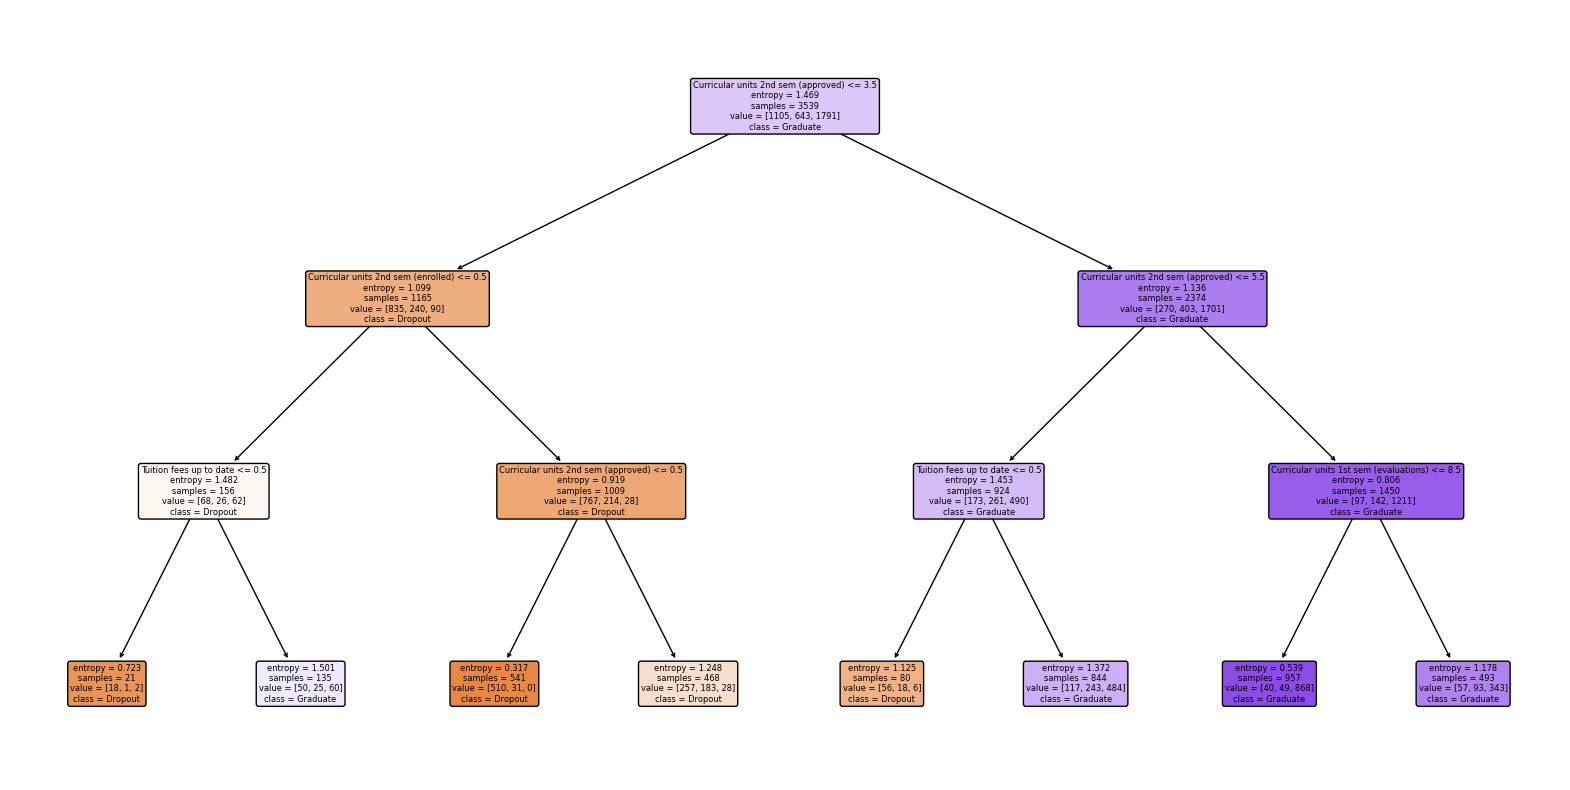

In [23]:
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, rounded=True, 
          feature_names=df.drop(columns=['Target', 'Agglomerative Cluster', 'KMeans Cluster']).columns.tolist(), 
          class_names=['Dropout', 'Enrolled', 'Graduate'])
plt.show()

In [24]:
print('Accuracy Score: ', accuracy_score(labels_test, labels_pred))
print('Confusion Matrix: \n', confusion_matrix(labels_test, labels_pred))

Accuracy Score:  0.7209039548022599
Confusion Matrix: 
 [[233   0  83]
 [ 57   0  94]
 [ 13   0 405]]


In [25]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr'))

parameters = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet', None]
}

grid_search = GridSearchCV(pipeline, parameters, cv=3, scoring='roc_auc_ovr')

grid_search.fit(features_train, labels_train)

print("Best parameters: ", grid_search.best_params_)
print("Best ROC AUC score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)
print("Best test score: ", grid_search.score(features_test, labels_test))

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1

/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
108 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 420, in fit

Best parameters:  {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}
Best ROC AUC score:  0.8721871047039516
Best estimator:  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=1000, multi_class='ovr',
                                    penalty='l1', random_state=42,
                                    solver='saga'))])
Best test score:  0.8576701643346455


In [26]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000, solver='saga', multi_class='ovr', C=0.1, penalty='l1'))

pipeline.fit(features_train, labels_train)

labels_pred = pipeline.predict(features_test)

In [27]:
print('Accuracy Score: ', accuracy_score(labels_test, labels_pred))
print('Confusion Matrix: \n', confusion_matrix(labels_test, labels_pred))

Accuracy Score:  0.7536723163841808
Confusion Matrix: 
 [[241  19  56]
 [ 39  29  83]
 [ 12   9 397]]


In [28]:
import xgboost as xgb

# Assuming features_train, labels_train are your training features and labels
xgb_classifier = xgb.XGBClassifier()

parameters = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.5, 1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.3, 0.5, 0.8]
}

grid_search = GridSearchCV(xgb_classifier, parameters, cv=3, scoring='roc_auc_ovr')
grid_search.fit(features_train, labels_train)

# Print the best parameters and highest ROC AUC score
print("Best parameters: ", grid_search.best_params_)
print("Best ROC AUC score: ", grid_search.best_score_)

Best parameters:  {'colsample_bytree': 0.5, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}
Best ROC AUC score:  0.8965494985154865


In [29]:
parameters = {
    'colsample_bytree': 0.3,
    'gamma': 1,
    'learning_rate': 0.05,
    'max_depth': 5,
    'n_estimators': 300,
    'subsample':1
}

xgb_classifier = xgb.XGBClassifier(**parameters, random_state=42, objective="multi:softmax", num_class=3)
xgb_classifier.fit(features_train, labels_train, early_stopping_rounds=5, eval_set=[(features_test, labels_test)], verbose=False)

labels_pred = xgb_classifier.predict(features_test)

/Users/mac/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [30]:
print('Accuracy Score: ', accuracy_score(labels_test, labels_pred))
print('Confusion Matrix: \n', confusion_matrix(labels_test, labels_pred))

Accuracy Score:  0.7649717514124293
Confusion Matrix: 
 [[236  30  50]
 [ 35  52  64]
 [  9  20 389]]


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

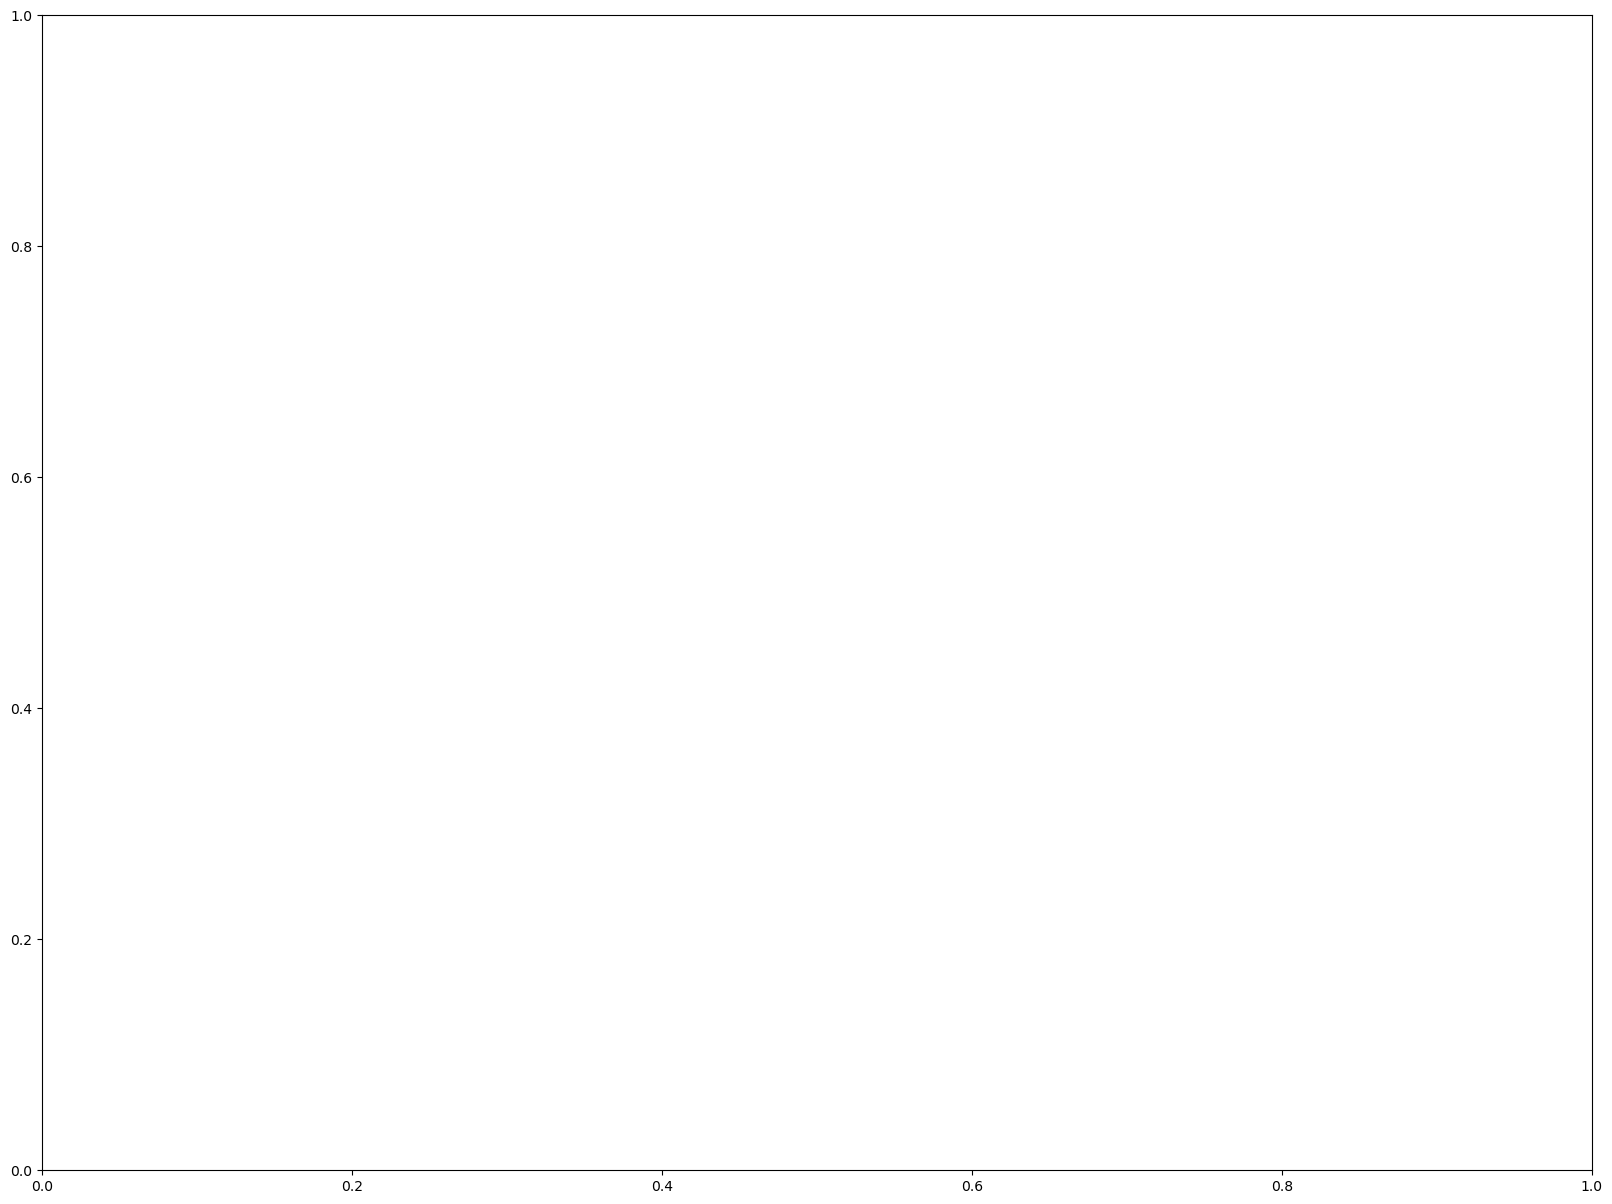

In [32]:
fig, ax = plt.subplots(figsize=(20, 15))

xgb.plot_tree(xgb_classifier, ax=ax)
plt.show()

/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


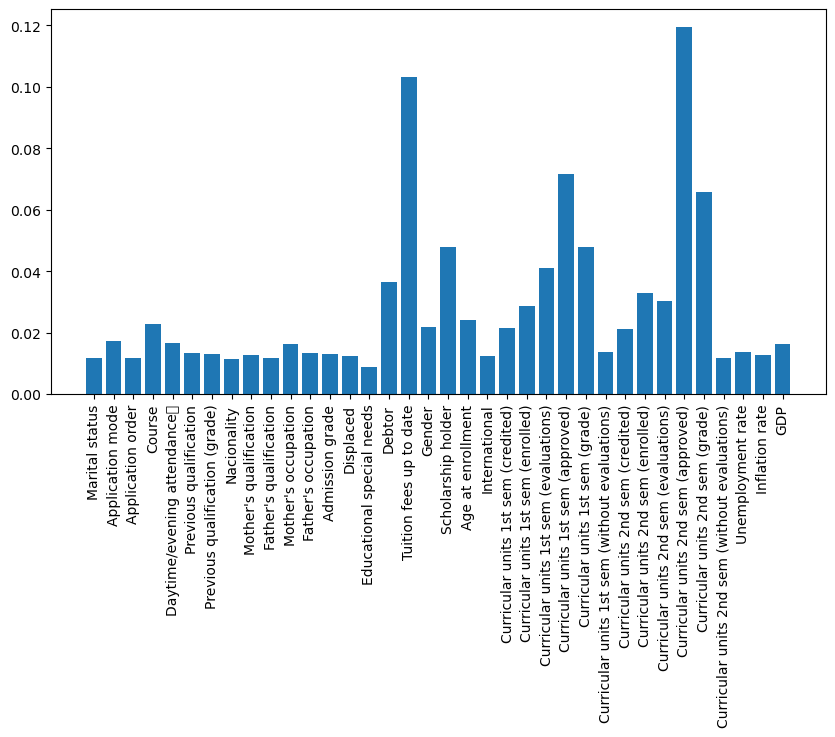

In [33]:
feature_importances = xgb_classifier.feature_importances_

# Sample a subset of the DataFrame if it's very large
df_sample = df.sample(n=1000)

plt.figure(figsize=(10, 5))
plt.bar(df_sample.drop(columns=['Target', 'Agglomerative Cluster', 'KMeans Cluster']).columns, feature_importances)
plt.xticks(rotation=90)
plt.show()

In [34]:
rf_classifier = RandomForestClassifier(random_state=42)

parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf_classifier, parameters, cv=3, scoring='roc_auc_ovr')

grid_search.fit(features_train, labels_train)

# Print the best parameters and highest ROC AUC score
print("Best parameters: ", grid_search.best_params_)
print("Best ROC AUC score: ", grid_search.best_score_)
print("Best estimator: ", grid_search.best_estimator_)
print("Best index: ", grid_search.best_index_)
print("Scorer function: ", grid_search.scorer_)

Best parameters:  {'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 300}
Best ROC AUC score:  0.8778581682993282
Best estimator:  RandomForestClassifier(bootstrap=False, max_depth=5, n_estimators=300,
                       random_state=42)
Best index:  32
Scorer function:  make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr)


In [35]:
rf_classifier = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_classifier.fit(features_train, labels_train)

labels_pred = rf_classifier.predict(features_test)

In [40]:
print('Accuracy Score: ', accuracy_score(labels_test, labels_pred))
print('Confusion Matrix: \n', confusion_matrix(labels_test, labels_pred))


Accuracy Score:  0.7536723163841808
Confusion Matrix: 
 [[237   8  71]
 [ 39  28  84]
 [ 10   6 402]]


/Users/mac/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


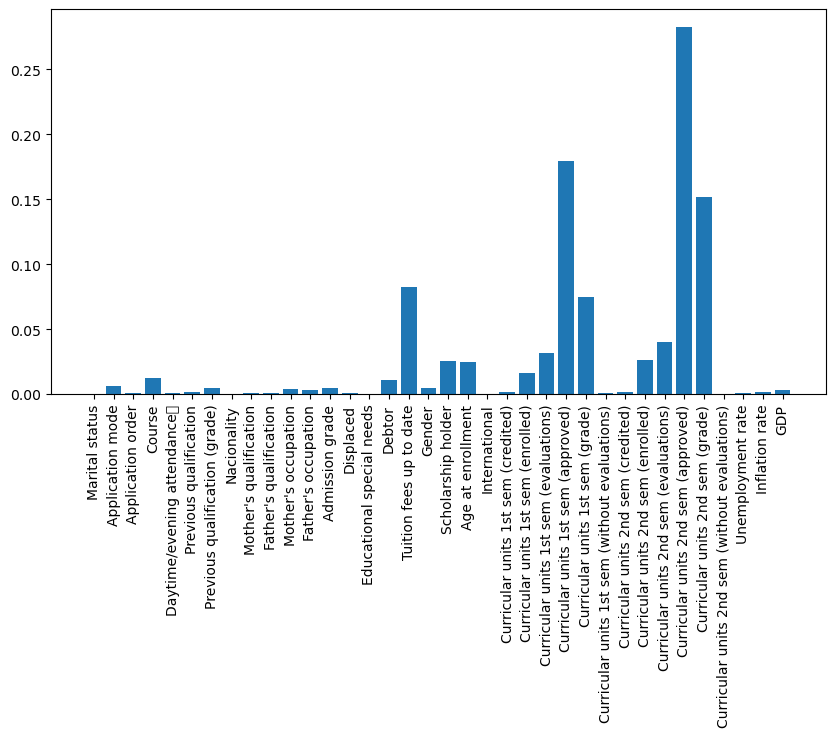

In [41]:
plt.figure(figsize=(10, 5))
plt.bar(df.drop(columns=['Target', 'Agglomerative Cluster', 'KMeans Cluster']).columns, rf_classifier.feature_importances_)
plt.xticks(rotation=90)
plt.show()

"Tidak ada perbedaan besar antara akurasi model-model tersebut, namun yang terbaik adalah XGBoost dengan akurasi 76%. Yang menarik adalah bahwa XGBoost menggunakan hampir semua fitur meskipun adanya korelasi antara beberapa fitur tersebut. Jadi, dapat dikatakan bahwa XGBoost adalah model terbaik untuk dataset ini."